Analisi Diffusione COVID-19
Il committente richiede di avere un report su casi e vaccinazioni in diverse aree del mondo; a tal fine, richiede di utilizzare il dataset, curato da Our World in Data, all'indirizzo https://github.com/owid/covid-19-data/tree/master/public/data alla voce " ! 1. Download our complete COVID-19 dataset" scaricare il dataset nel formato che si preferisce.

In [2]:
import pandas as pd 
cv = pd.read_csv("owid-covid-data.csv")
cv

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
429430,ZWE,Africa,Zimbabwe,2024-07-31,266386.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN
429431,ZWE,Africa,Zimbabwe,2024-08-01,266386.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN
429432,ZWE,Africa,Zimbabwe,2024-08-02,266386.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN
429433,ZWE,Africa,Zimbabwe,2024-08-03,266386.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN


1. Si richiede di verificare le dimensioni del dataset e i relativi metadati

In [4]:
print("Le Dimensioni del dataset sono: ", cv.shape)

Le Dimensioni del dataset sono:  (429435, 67)


In [9]:
print("I metadati sono: " , cv.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429435 entries, 0 to 429434
Data columns (total 68 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    429435 non-null  object 
 1   continent                                   402910 non-null  object 
 2   location                                    429435 non-null  object 
 3   date                                        429435 non-null  object 
 4   total_cases                                 411804 non-null  float64
 5   new_cases                                   410159 non-null  float64
 6   new_cases_smoothed                          408929 non-null  float64
 7   total_deaths                                411804 non-null  float64
 8   new_deaths                                  410608 non-null  float64
 9   new_deaths_smoothed                         409378 non-null  float64
 

In [8]:
print("Possiamo vederli anche con : ", cv.describe)

<bound method NDFrame.describe of        iso_code continent     location        date  total_cases  new_cases  \
0           AFG      Asia  Afghanistan  2020-01-05          0.0        0.0   
1           AFG      Asia  Afghanistan  2020-01-06          0.0        0.0   
2           AFG      Asia  Afghanistan  2020-01-07          0.0        0.0   
3           AFG      Asia  Afghanistan  2020-01-08          0.0        0.0   
4           AFG      Asia  Afghanistan  2020-01-09          0.0        0.0   
...         ...       ...          ...         ...          ...        ...   
429430      ZWE    Africa     Zimbabwe  2024-07-31     266386.0        0.0   
429431      ZWE    Africa     Zimbabwe  2024-08-01     266386.0        0.0   
429432      ZWE    Africa     Zimbabwe  2024-08-02     266386.0        0.0   
429433      ZWE    Africa     Zimbabwe  2024-08-03     266386.0        0.0   
429434      ZWE    Africa     Zimbabwe  2024-08-04     266386.0        0.0   

        new_cases_smoothed  t

2. Si chiede di trovare, per ogni continente:
 a. il numero di casi fin dall'inizio della pandemia
 b. la percentuale rispetto al totale mondiale del numero di casi

In [25]:
#il numero di casi fin dall'inizio della pandemia
continent_case = cv.groupby("continent")["new_cases"].sum()
continent_case

continent
Africa            13146831.0
Asia             301564180.0
Europe           252916868.0
North America    124492698.0
Oceania           15003468.0
South America     68811012.0
Name: new_cases, dtype: float64

In [21]:
#la percentuale rispetto al totale mondiale del numero di casi
perc_casi = continent_case / continent_case.sum() *100
perc_casi

continent
Africa            1.694321
Asia             38.864616
Europe           32.595108
North America    16.044216
Oceania           1.933598
South America     8.868141
Name: new_cases, dtype: float64

3. Selezionare i dati relativi all'Italia nel 2022 e mostrare con dei grafici adeguati:
 a. l'evoluzione del casi totali dall'inizio alla fine dell'anno
 b. il numero di nuovi casi rispetto alla data; poiché i nuovi casi vengono registrati settimanalmente, filtrare via i dati che non hanno misurazioni

<Axes: xlabel='date'>

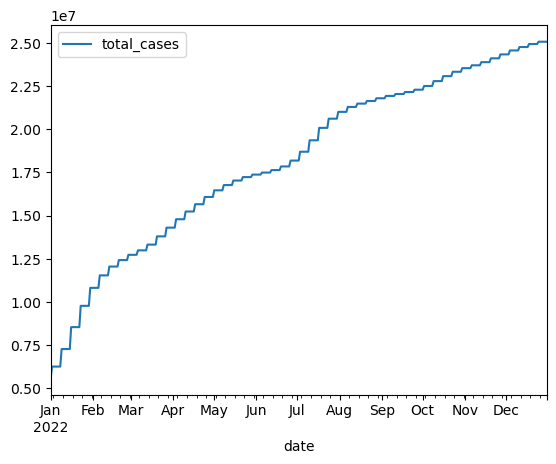

In [63]:
#a. l'evoluzione del casi totali dall'inizio alla fine dell'anno
cv["date"] = pd.to_datetime(cv["date"])
cv["year"] = cv["date"].dt.year
filtro_it = cv.loc[:,"location"] == "Italy"
filtro_22 = cv.loc[:,"year"] == 2022
filtro = filtro_it & filtro_22

cv.loc[filtro].plot(x="date",y="total_cases")

<Axes: xlabel='date'>

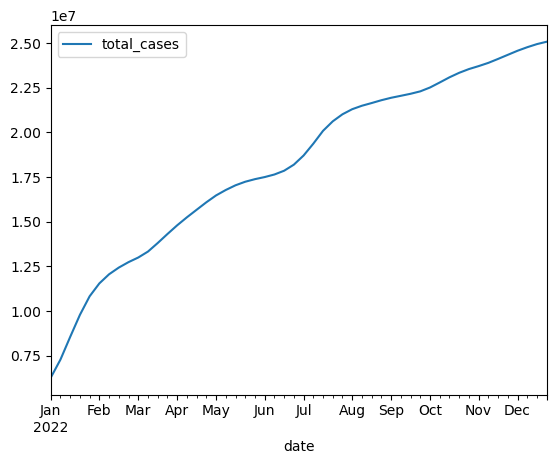

In [64]:
#b. il numero di nuovi casi rispetto alla data; poiché i nuovi casi vengono registrati settimanalmente, filtrare via i dati che non hanno misurazioni 
filtro_week = cv.loc[:,"new_cases"] > 0
filtro_2 = filtro & filtro_week

cv.loc[filtro_2].plot(x="date",y="total_cases")


Riguardo le nazioni di Italia, Germania e Francia mostrare in un boxplot la differenza tra queste nazioni riguardo il numero di pazienti in terapia intensiva (Intensive Care Unit, ICU) da maggio 2022 (incluso) ad aprile 2023 (incluso) a. scrivere un breve commento a riguardo

<Axes: xlabel='location', ylabel='icu_patients'>

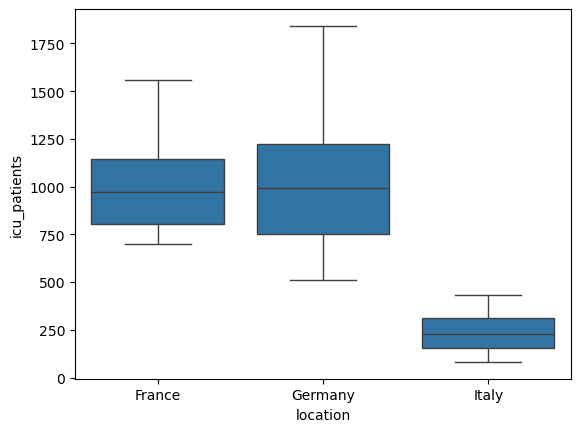

In [83]:
import seaborn as sns
filtro_0522 = cv.loc[:,"date"] >= "2022-05-01"
filtro_0423 = cv.loc[:,"date"] <= "2023-04-30"
filtro_data = filtro_0522 & filtro_0423
filtro_country = cv.loc[:,"location"].isin(["Italy","France","Germany"])
filtro = filtro_country & filtro_data
cv_filtro = cv[filtro]

sns.boxplot(data = cv_filtro, x = "location", y= "icu_patients")


COMMENTO BOXPLOT:
Da come possiamo vedere, nel periodo tra Maggio 2022 e Aprile 2023, i casi di terapia intensiva in Francia , Germania e Italia, sono diversi tra loro.
in Italia, si hanno molti meno casi rispetto gli altri due paesi ed il range tra max e minimo è molto ridotto tra i circa 100 casi fino a circa 450.
molto diverso la situazione in Francia e Germania, dove ci sono stati molti più casi in media, e per entrambi la media si gira intorno ai 1000 casi.
la differenza sostanziale tra Francia e Germania è che in Germania il range tra massimi e minimi è molto più alto rispetto la Francia.


Riguardo le Nazioni di Italia, Germania, Francia e Spagna in tutto il 2023:
a. mostrare la somma dei pazienti ospitalizzati per ognuna
b. se ci sono dati nulli, con un breve commento scrivere se può essere possibile gestirli tramite sostituzione o meno

In [3]:
filtro_23 = cv.loc[:,"year"] = 2023
filtro_country = cv.loc[:,"location"].isin(["Italy","France","Germany","Spain"])
filtro = filtro_23 & filtro_country
cv_filtro = cv[filtro]
cv_filtro.groupby("location")["hosp_patients"].sum()

location
France     19367212.0
Germany           0.0
Italy      13481707.0
Spain       6472838.0
Name: hosp_patients, dtype: float64

b. se ci sono dati nulli, con un breve commento scrivere se può essere possibile gestirli tramite sostituzione o meno

in questo caso non ci sono dati da poter copiare, perchè tutta la Germania del 2023 è nulla.
vedendo i dati, si potrebbe cercare di usare la tabella della "weekly_hosp_admission" per avere un idea di quanti casi ospedalizzati ci possono essere per giorno.

In [8]:
filtro_de = cv_filtro.loc[:,"location"] == "Germany"
cv_filtro.loc[filtro_de, "hosp_patients"] = cv_filtro.loc[filtro_de,"hosp_patients"].fillna(cv_filtro["weekly_hosp_admissions"])
cv_filtro.groupby("location")["hosp_patients"].sum()

location
France     19367212.0
Germany     6736952.0
Italy      13481707.0
Spain       6472838.0
Name: hosp_patients, dtype: float64